In [7]:
import pandas as pd

#  Read Data

In [8]:
df=pd.read_csv("HistoricalData_1721425584025.csv")

#  Describe the Data

In [9]:
df.head()


,Date,Close/Last,Volume,Open,High,Low
0,07/18/2024,$224.18,66034590,$230.28,$230.44,$222.27
1,07/17/2024,$228.88,57345880,$229.45,$231.4599,$226.64
2,07/16/2024,$234.82,43234280,$235.00,$236.27,$232.33
3,07/15/2024,$234.40,62631250,$236.48,$237.23,$233.09
4,07/12/2024,$230.54,53046530,$228.92,$232.64,$228.68


In [10]:
#Check for Null Values
df.isnull().sum()


Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

No Null values in the entire dataset


In [11]:
#check DataType of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1258 non-null   object
 1   Close/Last  1258 non-null   object
 2   Volume      1258 non-null   int64 
 3   Open        1258 non-null   object
 4   High        1258 non-null   object
 5   Low         1258 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [12]:
df['Close/Last'] = df['Close/Last'].str.strip('$').astype(float)
df['Open'] = df['Open'].str.strip('$').astype(float)
df['High'] = df['High'].str.strip('$').astype(float)
df['Low'] = df['Low'].str.strip('$').astype(float)

In [13]:
df.head()
df.tail()


,Date,Close/Last,Volume,Open,High,Low
1253,07/25/2019,51.7550,55638240,52.2225,52.3100,51.6825
1254,07/24/2019,52.1675,59966280,51.9175,52.2875,51.7925
1255,07/23/2019,52.2100,73420840,52.1150,52.2275,51.8225
1256,07/22/2019,51.8050,89111720,50.9125,51.8075,50.9025
1257,07/19/2019,50.6475,83717240,51.4475,51.6250,50.5900


In [14]:
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1258 non-null   datetime64[ns]
 1   Close/Last  1258 non-null   float64       
 2   Volume      1258 non-null   int64         
 3   Open        1258 non-null   float64       
 4   High        1258 non-null   float64       
 5   Low         1258 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [16]:
df.head()
df.tail()


,Date,Close/Last,Volume,Open,High,Low
1253,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825
1254,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925
1255,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225
1256,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025
1257,2019-07-19,50.6475,83717240,51.4475,51.6250,50.5900


#  EDA

In [17]:
df.describe()

,Date,Close/Last,Volume,Open,High,Low
count,1258,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,2022-01-15 15:18:01.717011200,138.514147,9.612987e+07,138.388858,139.945450,136.946187
min,2019-07-19 00:00:00,48.335000,2.404834e+07,48.852500,49.516800,48.145000
25%,2020-10-15 06:00:00,116.810000,6.173908e+07,117.307500,118.982500,115.678350
50%,2022-01-13 12:00:00,146.375000,8.237829e+07,146.145000,147.843950,144.950000
75%,2023-04-17 18:00:00,171.815000,1.129610e+08,171.310000,173.207500,170.097500
max,2024-07-18 00:00:00,234.820000,4.268848e+08,236.480000,237.230000,233.090000
std,NaN,42.137286,5.237765e+07,42.128056,42.431509,41.832439


In [18]:
df.shape

(1258, 6)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Apple stock value changes since 2019')

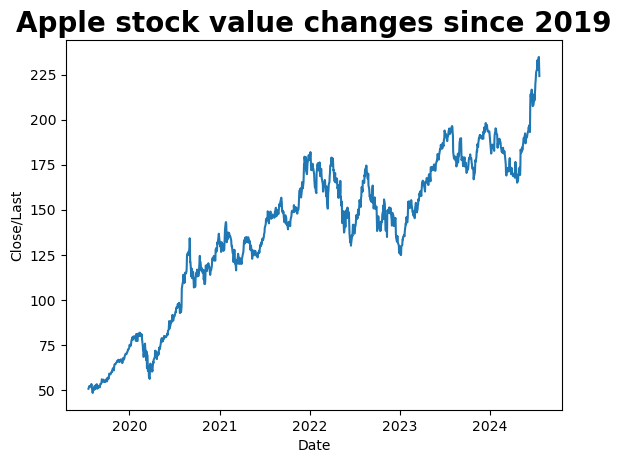

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

ax=sns.lineplot(data=df, x='Date', y='Close/Last')
plt.title("Apple stock value changes since 2019",size=20, weight='bold')


#  LSTM Model


In [20]:
X=df[("Close/Last")]
length=100
#Split the dataset and normalize
training_set=X.iloc[:1000].values
test_set=X.iloc[1000:].values
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_reshaped = training_set.reshape(-1, 1)
test_set_reshaped = test_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set_reshaped)
test_set_scaled = sc.fit_transform(test_set_reshaped)

print(training_set_scaled.shape)
print(test_set_scaled.shape)
#Creating a data structurewith 60 timesteps and 1 output
X_train=[]
Y_train=[]
for i in range(length,len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    Y_train.append(training_set_scaled[i, 0])
    print(i-length,"i-1",i-1,"i",i)


(1000, 1)
(258, 1)
0 i-1 99 i 100
1 i-1 100 i 101
2 i-1 101 i 102
3 i-1 102 i 103
4 i-1 103 i 104
5 i-1 104 i 105
6 i-1 105 i 106
7 i-1 106 i 107
8 i-1 107 i 108
9 i-1 108 i 109
10 i-1 109 i 110
11 i-1 110 i 111
12 i-1 111 i 112
13 i-1 112 i 113
14 i-1 113 i 114
15 i-1 114 i 115
16 i-1 115 i 116
17 i-1 116 i 117
18 i-1 117 i 118
19 i-1 118 i 119
20 i-1 119 i 120
21 i-1 120 i 121
22 i-1 121 i 122
23 i-1 122 i 123
24 i-1 123 i 124
25 i-1 124 i 125
26 i-1 125 i 126
27 i-1 126 i 127
28 i-1 127 i 128
29 i-1 128 i 129
30 i-1 129 i 130
31 i-1 130 i 131
32 i-1 131 i 132
33 i-1 132 i 133
34 i-1 133 i 134
35 i-1 134 i 135
36 i-1 135 i 136
37 i-1 136 i 137
38 i-1 137 i 138
39 i-1 138 i 139
40 i-1 139 i 140
41 i-1 140 i 141
42 i-1 141 i 142
43 i-1 142 i 143
44 i-1 143 i 144
45 i-1 144 i 145
46 i-1 145 i 146
47 i-1 146 i 147
48 i-1 147 i 148
49 i-1 148 i 149
50 i-1 149 i 150
51 i-1 150 i 151
52 i-1 151 i 152
53 i-1 152 i 153
54 i-1 153 i 154
55 i-1 154 i 155
56 i-1 155 i 156
57 i-1 156 i 157
58 i-1

In [21]:
import numpy as np 
X_train,Y_train=np.array(X_train), np.array(Y_train)
X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

X_test=[]
Y_test=[]
for i in range(length,len(test_set)):
    X_test.append(test_set_scaled[i-length:i,0])
    Y_test.append(test_set_scaled[i,0])
X_test, Y_test=np.array(X_test), np.array(Y_test)


In [24]:

from keras.models import Sequential 
from keras.layers import Dense,LSTM , Dropout
model=Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
#Adding the second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
#Adding the third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
#Adding the fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))
#Addding the output layer
model.add(Dense(units=1))

#Compiling the RNN 
model.compile(optimizer='adam',loss='mean_squared_error')
#Fitting the RNN to the training set
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=32)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - loss: 0.0522 - val_loss: 0.0148
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.0090 - val_loss: 0.0110
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - loss: 0.0058 - val_loss: 0.0102
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0053 - val_loss: 0.0088
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - loss: 0.0059 - val_loss: 0.0085
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - loss: 0.0052 - val_loss: 0.0076
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - loss: 0.0045 - val_loss: 0.0092
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0050 - val_loss: 0.0075
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 

#  Model Evaluation

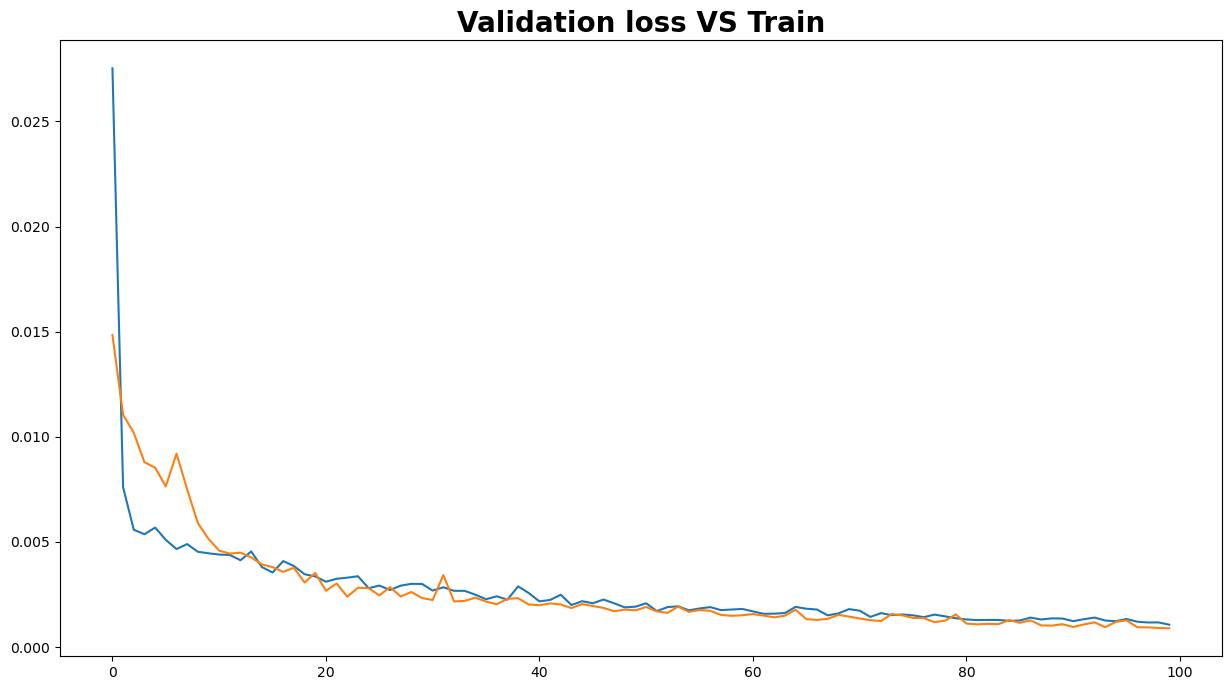

In [27]:
loss=pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss VS Train",size=20,weight="bold")
plt.plot(loss)

In [29]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=Y_test
test['pred']=pred.flatten()
test

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step


,test,pred
0,0.546754,0.462893
1,0.479684,0.504859
2,0.527113,0.508180
3,0.399920,0.511626
4,0.400720,0.470078
...,...,...
153,0.068369,0.092674
154,0.076616,0.086219
155,0.077465,0.080359
156,0.069369,0.077689


 ************ LSTM Performance ***************
R2 Score: 0.98
Mean squared error: 0.0
Mean Absolute error: 0.02


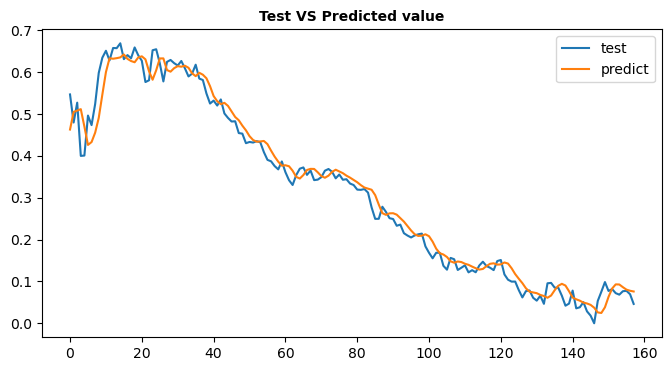

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
fig=plt.figure(figsize=(8,4))
plt.title('Test VS Predicted value',size=10, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(Y_test,pred),2)
mse=np.round(mean_squared_error(Y_test,pred),2)
mae=np.round(mean_absolute_error(Y_test,pred),2)

print(" ************ LSTM Performance ***************")
print("R2 Score:", r2)
print("Mean squared error:",mse )
print("Mean Absolute error:", mae)

